In [11]:
import numpy as np
from scipy.io.wavfile import read, write
import sounddevice as sd
import matplotlib.pyplot as plt
import librosa.display
from scipy import signal

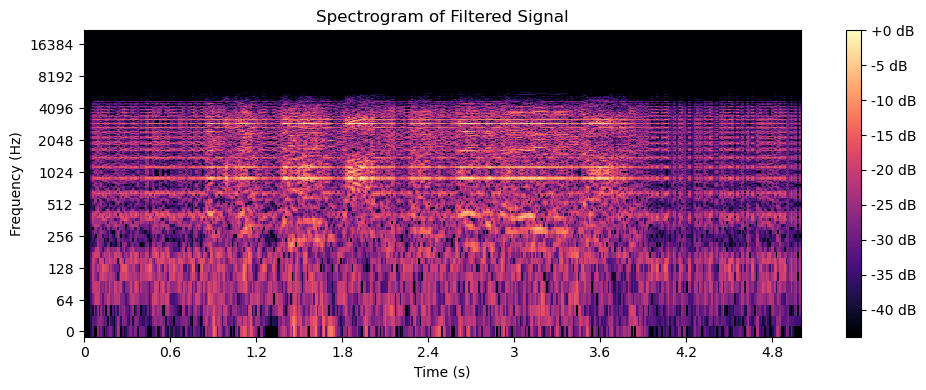

In [12]:
# Load the combined speech and sine tone signal
y1, sample_rate1 = librosa.load('CharpPinaWest-speechchirp.wav', sr=44100, mono=True)

# Define the cutoff frequency for the lowpass filter
cutoff_frequency = 4000  # Hz

# Normalize the cutoff frequency to Nyquist frequency
nyquist_frequency = 0.5 * sample_rate1
normalized_cutoff = cutoff_frequency / nyquist_frequency

# Design the lowpass filter
b, a = signal.butter(8, normalized_cutoff, btype='low')

# Apply the filter to the signal
filtered_signal = signal.lfilter(b, a, y1)

# Play the resulting signal
sd.play(filtered_signal, sample_rate1)
sd.wait()  # Wait until the signal is done playing

# Save the resulting signal to a WAV file
write('teamKKA-filteredspeechsine.wav', sample_rate1, np.int16(filtered_signal * 32767))

# Plot the spectrogram of the resulting signal
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(filtered_signal)), ref=np.max), sr=sample_rate1, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.savefig('filtered_signal_spectrogram.png')
plt.show()
